# Random Sampling 
In this notebook you'll work with the obstacle's polygon representation itself.

Your tasks will be: 
1. Create polygons
2. Sample random 3D points 
3. Remove points contained by an obstacle polygon 

recall that a point $(x,y,z)$ collides with a polygon if the $(x,y)$ coordinates are contained by the polygon and th $z$ coordinate (height) is less than the height of the polygon 

In [23]:
import numpy as np 
import matplotlib.pyplot as plt 
from shapely.geometry import Polygon, Point
from ConfigurationSpace import create_grid
import time
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,12

In [3]:
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)

In [39]:
def extract_polygons(data):
  polygons = []
  for i in range(data.shape[0]):
    north_max = data[i][0] + data[i][3]
    north_min = data[i][0] - data[i][3]
    east_max = data[i][1] + data[i][4]
    east_min = data[i][1] - data[i][4]
    height = data[i][2] + data[i][5]
    polygon = Polygon([(north_min,north_max),(north_min,east_max),
                       (north_max,east_max),(north_max,east_min)])
    polygons.append((polygon,height))
  return polygons

In [30]:
def collides(polygons,point):
  for p,height in polygons:
    if p.contains(Point(point[:2])) and height >= point[2]:
      return True
  return False

In [ ]:
polygons = extract_polygons(data)
start_time = time.time()
to_keep = []
for point in samples:
  if not collides(polygons,point):
    to_keep.append(point)
execution_time = time.time() - start_time
print('Time of execution: ',execution_time)

In [43]:
xmin = np.min(data[:, 0] - data[:, 3])
xmax = np.max(data[:, 0] + data[:, 3])

ymin = np.min(data[:, 1] - data[:, 4])
ymax = np.max(data[:, 1] + data[:, 4])

zmin = 0
zmax = 10

# Sampling Points
num_samples = 100
xvals = np.random.uniform(xmin,xmax,num_samples)
yvals = np.random.uniform(ymin,ymax,num_samples)
zvals = np.random.uniform(zmin,zmax,num_samples)
samples = list(zip(xvals,yvals,zvals))

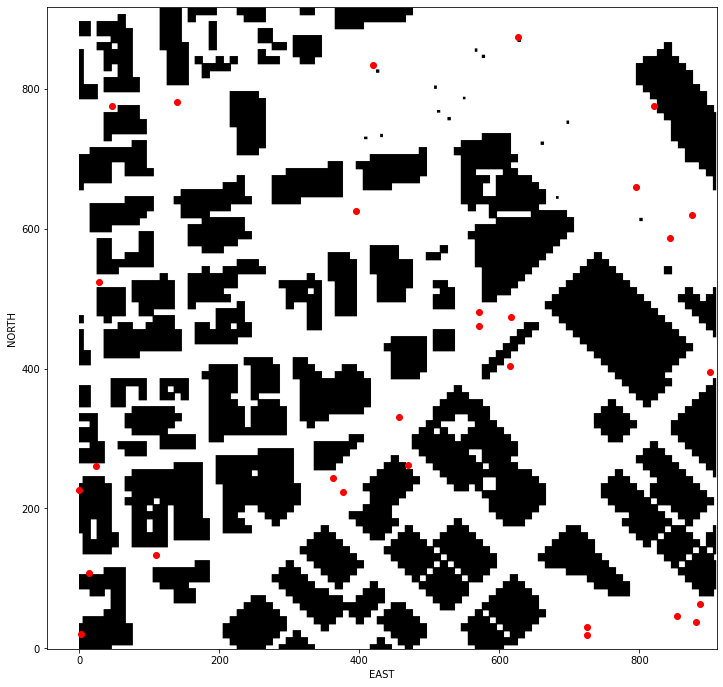

In [45]:
fig = plt.figure()
grid = create_grid(data, zmax, 1)
plt.imshow(grid, cmap='Greys', origin='lower')

nmin = np.min(data[:, 0])
emin = np.min(data[:, 1])

# draw points
all_pts = np.array(to_keep)
north_vals = all_pts[:,0]
east_vals = all_pts[:,1]
plt.scatter(east_vals - emin, north_vals - nmin, c='red')

plt.ylabel('NORTH')
plt.xlabel('EAST')

plt.show()

## Epilogue

You may have noticed removing points can be quite lengthy. In the implementation provided here we're naively checking to see if the point collides with each polygon when in reality it can only collide with one, the one that's closest to the point. The question then becomes 

"How do we efficiently find the closest polygon to the point?"

One such approach is to use a *[k-d tree](https://en.wikipedia.org/wiki/K-d_tree)*, a space-partitioning data structure which allows search queries in $O(log(n))$. The *k-d tree* achieves this by cutting the search space in half on each step of a query.

This would bring the total algorithm time down to $O(m * log(n))$ from $O(m*n)$.

The scikit-learn library has an efficient implementation [readily available](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree).